## Read csv files into DataFrame

In [453]:
import pandas as pd

# u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.
#               Each user has rated at least 20 movies.  Users and items are
#               numbered consecutively from 1.  The data is randomly
#               ordered. This is a tab separated list of 
# 	         user id | item id | rating | timestamp. 
#               The time stamps are unix seconds since 1/1/1970 UTC   

u_data = pd.read_csv("./ml-100k/u.data") #this is the relative path from your notebook to the data file. Change if necessary
u_data = pd.read_csv("./ml-100k/u.data", sep='\t', header=None, names=["userID", "itemID", "rating", "timestamp"]) #define the separator as the tab character
u_data.head()

u_data = u_data.sort_values(["itemID","userID"]).reset_index(drop=True)
print(u_data.shape)
u_data.head()

(100000, 4)


,userID,itemID,rating,timestamp
0,1,1,5,874965758
1,2,1,4,888550871
2,5,1,4,875635748
3,6,1,4,883599478
4,10,1,4,877888877


In [454]:
u_item = pd.read_csv("./ml-100k/u.item", sep="|", header=None, names=["movie id","movie title","release date","video release date",
              "IMDb URL","unknown","Action","Adventure","Animation",
              "Children's", "Comedy","Crime","Documentary","Drama","Fantasy",
              "Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi",
              "Thriller","War","Western"], encoding = "Latin1")

u_item.drop(["IMDb URL","video release date"],inplace=True, axis = 1)
u_item = u_item.set_index("movie id")
print(u_item.shape)
u_item.head()

(1682, 21)


,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [455]:
u_user = pd.read_csv("./ml-100k/u.user",sep="|",header = None, names = ["user id","age", "gender","occupation","zip code"])
u_user = u_user.set_index("user id")
print(u_user.shape)
u_user.head()

(943, 4)


,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


## Join the DataFrames

In [456]:
u_data.merge(u_user,how = 'left',right_index = True,left_on = 'userID')

,userID,itemID,rating,timestamp,age,gender,occupation,zip code
0,1,1,5,874965758,24,M,technician,85711
1,2,1,4,888550871,53,F,other,94043
2,5,1,4,875635748,33,F,other,15213
3,6,1,4,883599478,42,M,executive,98101
4,10,1,4,877888877,53,M,lawyer,90703
...,...,...,...,...,...,...,...,...
99995,863,1678,1,889289570,17,M,student,60089
99996,863,1679,3,889289491,17,M,student,60089
99997,863,1680,2,889289570,17,M,student,60089
99998,896,1681,3,887160722,28,M,writer,91505


In [457]:
dataBase = data_user.join(u_item, on = "itemID") #u_data.itemID is idential to u_item.movie id
dataBase

,userID,itemID,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,5,874965758,24,M,technician,85711,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
1,2,1,4,888550871,53,F,other,94043,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
2,5,1,4,875635748,33,F,other,15213,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
3,6,1,4,883599478,42,M,executive,98101,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
4,10,1,4,877888877,53,M,lawyer,90703,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,1678,1,889289570,17,M,student,60089,Mat' i syn (1997),06-Feb-1998,...,0,0,0,0,0,0,0,0,0,0
99996,863,1679,3,889289491,17,M,student,60089,B. Monkey (1998),06-Feb-1998,...,0,0,0,0,0,1,0,1,0,0
99997,863,1680,2,889289570,17,M,student,60089,Sliding Doors (1998),01-Jan-1998,...,0,0,0,0,0,1,0,0,0,0
99998,896,1681,3,887160722,28,M,writer,91505,You So Crazy (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


**Missing value check across dataBase columns**

In [458]:
#Missing value check across dataBase columns 
dataBase.isnull().sum()

userID          0
itemID          0
rating          0
timestamp       0
age             0
gender          0
occupation      0
zip code        0
movie title     0
release date    9
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

9 missing values on release date, not a big deal since we're not using release date as a variable.

In [459]:
#check if there are missing values for genre that is none of the genre columns with value 1
(dataBase.iloc[:,-19:].sum(axis=1)==0).sum()

0

## Data Exploration

In [460]:
# standard plotting library
import matplotlib.pyplot as plt
# prettify plots
import seaborn as sns

**Average Rating per User**

In [461]:
print("avg_rating_per_user describe\n")
avg_rating_per_user = data_user.groupby("userID").rating.mean()
print(avg_rating_per_user.describe())
avg_rating_per_user=avg_rating_per_user.reset_index().rename(columns = {'rating':'avg_rating'})


avg_rating_per_user describe

count    943.000000
mean       3.588191
std        0.445233
min        1.491954
25%        3.323054
50%        3.620690
75%        3.869565
max        4.869565
Name: rating, dtype: float64


Text(0.5, 1.0, 'Average Rating Histogram')

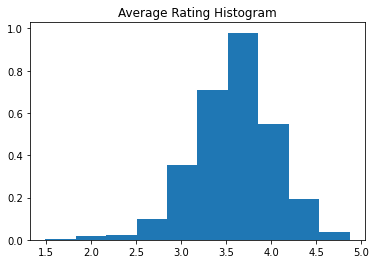

In [462]:
#Plotting user rating histogram
plt.hist(avg_rating_per_user.avg_rating.values,density = True)
plt.title("Average Rating Histogram")

### Categorical Variables

In [1032]:
#convert categorical variables to 'category' dtypes
for v in ['gender','age','occupation']:
    dataBase[v] = dataBase[v].astype('category') 
dataBase.columns[dataBase.dtypes == 'category']

Index(['age', 'gender', 'occupation'], dtype='object')

**Gender-Rating**

In [926]:
dataBase.groupby('gender').rating.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,25740.0,3.531507,1.170951,1.0,3.0,4.0,4.0,5.0
M,74260.0,3.529289,1.109556,1.0,3.0,4.0,4.0,5.0


Female and Male average rating is very *close*; 
except that female ratings has a *larger std* than male ratings.

**Age**

In [927]:
dataBase.age.describe()

count       100000
unique           8
top       (20, 30]
freq         39208
Name: age, dtype: object

Text(0.5, 1.0, 'Rating Across Age Group')

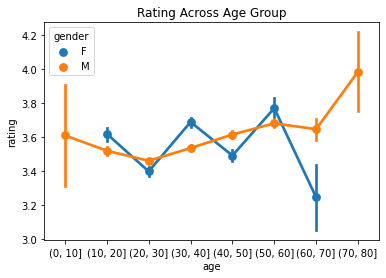

In [933]:
bins = [0,10,20,30,40,50,60,70,80]
age = pd.cut(dataBase.age, bins)
dataBase.age = age
sns.pointplot(data = dataBase, x= "age" ,y = "rating",hue = "gender")
plt.title("Rating Across Age Group")

This plot shows shows that a overall trend for rating along with age. The elder they are the higher the ratings are (ignore the female rating in [60, 70] age group for its high variance.
However, female rating *oscillates* much more than male ratings do. 
**The age group [30, 40] has the largest gender rating difference with female ratings above male ratings**.

Text(0.5, 1.0, 'Rating in the Age Group of (30, 40) ')

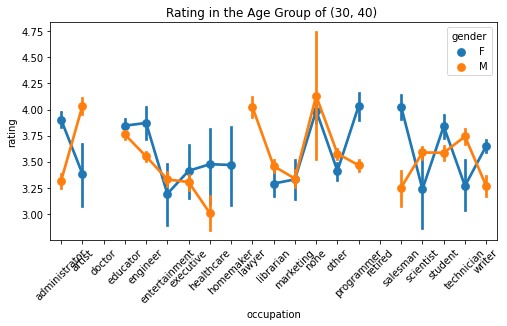

In [1193]:
interval = pd.Interval(30, 40, closed = 'right')
fig, ax = plt.subplots(figsize=(8,4))
sns.pointplot(data=dataBase[dataBase.age == interval], x = 'occupation', y = 'rating', hue = "gender"
             ,ax = ax)
h
plt.xticks(rotation = 45)
plt.title("Rating in the Age Group of (30, 40) ")

The above plot shows the gender difference within age group (30, 40) does vary with their occupations. 
**Occupation could be studied as an independent variable to investigate its effect on people's overall rating in the age group (30, 40).**

**Genre**

In [934]:
genre = pd.read_csv("./ml-100k/u.genre",sep='|',header=None).rename(columns={0:"genre"})#
genre.drop(1, axis=1, inplace=True)

#make a list of rating per genre
genre_overall = genre
genre_rating = []
for i in range(-19,0):
    genre_rating.append(dataBase.rating[dataBase.iloc[:,i]==1].values.tolist())
#add genre_rating column into the df
genre_overall['ratings'] = genre_rating

#make a genre rating describe 
r = pd.DataFrame(genre_overall.iloc[0].ratings).describe().T
for i in range(1,19):
    r = r.append(pd.DataFrame(genre_overall.iloc[i].ratings).describe().T)
r = r.reset_index(drop=True)
genre_overall = genre_overall.join(r).drop(columns = ["ratings"])
genre_overall= genre_overall.sort_values("mean",ascending=False)
genre_overall

,genre,count,mean,std,min,25%,50%,75%,max
10,Film-Noir,1733.0,3.921523,0.993433,1.0,3.0,4.0,5.0,5.0
17,War,9398.0,3.815812,1.080271,1.0,3.0,4.0,5.0,5.0
8,Drama,39895.0,3.687379,1.079125,1.0,3.0,4.0,5.0,5.0
7,Documentary,758.0,3.672823,1.180455,1.0,3.0,4.0,5.0,5.0
13,Mystery,5245.0,3.638132,1.091117,1.0,3.0,4.0,4.0,5.0
6,Crime,8055.0,3.632278,1.112540,1.0,3.0,4.0,4.0,5.0
14,Romance,19461.0,3.621705,1.096125,1.0,3.0,4.0,4.0,5.0
18,Western,1854.0,3.613269,1.041946,1.0,3.0,4.0,4.0,5.0
3,Animation,3605.0,3.576699,1.096615,1.0,3.0,4.0,4.0,5.0
15,Sci-Fi,12730.0,3.560723,1.133190,1.0,3.0,4.0,4.0,5.0


Among all the genres Film-Noir ratings is the highest with the smallest std under a relatively small sample size, which indicates **a great consensus of people favoring Film-Noir than the other genres**. Fantasy, in contrast is least favored.

Text(0.5, 1.0, 'Average Rating Across Genres')

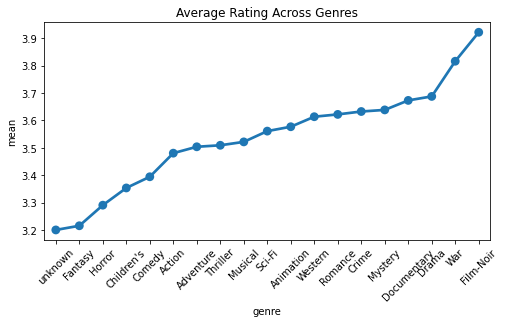

In [935]:
#plotting the average rating across genres
fig, ax = plt.subplots(figsize=(8,4))
sns.pointplot(data = genre_overall, x = "genre", y="mean",order=genre_overall.genre[::-1])
plt.xticks(rotation=45)
plt.title("Average Rating Across Genres")

**Hypothesis: among all the given genres Film-Noir is the most favorite genre and Fantasy is the least favorite.**

In [936]:
#avg_rating by gender
rating_FM = pd.DataFrame([dataBase[dataBase.iloc[:,i]==1].groupby('gender').rating.mean() for i in range(-19,0)],
                         index=genre.genre)
range(rating_FM.shape[1])
rating_FM.columns = range(rating_FM.shape[1])

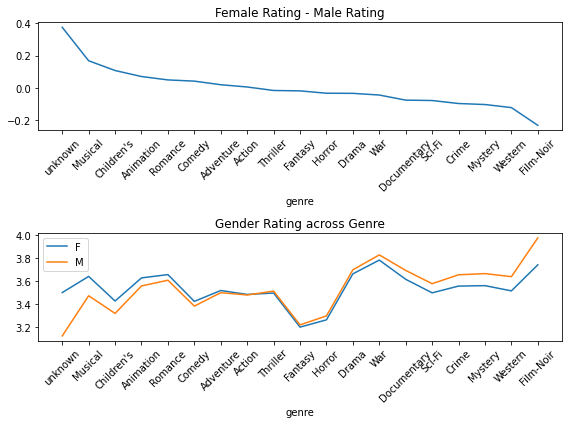

In [1298]:
rating_FM = rating_FM.rename(columns = {0:'F',1:"M"})
rating_FM["F-M"] = rating_FM.F - rating_FM.M

#plot the Female and Male rating difference where positive values indicate Female ratings are higher and negative values indicate male ratings are higher.
ax1=plt.subplot(2,1,1)
rating_FM['F-M'].sort_values(ascending = False).plot(kind="line",figsize=(8,6),
                                                     rot=45,
                                                     ax=ax1,
                                                    xticks= np.arange(19))
plt.title("Female Rating - Male Rating")
#plot Female ratings and Male ratign respectively and rating difference
ax2=plt.subplot(2,1,2)
rating_FM.sort_values(by="F-M", ascending = False).plot(y = ['F','M'],
                                                        figsize = (8,6),rot=45,
                                                        xticks= np.arange(19),
                                                        ax=ax2) 
plt.title("Gender Rating across Genre")
plt.tight_layout()

In [1311]:
np.corrcoef(rating_FM.F,rating_FM.M)[0,1]

0.7926985888339703

 This plot shows **female and male ratings across genres are *positively correlated* (corrcoef = 0.79) except for Musical and Film-Noir the gender rating difference manifests.**

**Occupation**

Text(0.5, 1.0, 'Occupation Rating')

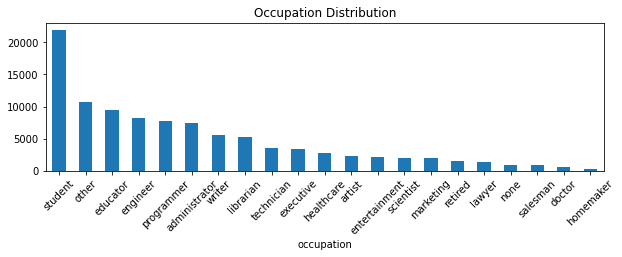

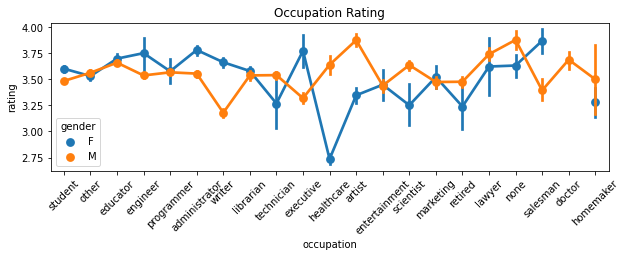

In [1169]:
#plot the occupation population
ax1 = plt.subplot(2,1,1)
occupation_dist = dataBase.groupby('occupation')['userID'].count().sort_values(ascending = False)

#gender_pop = population.groupby('gender').count()
occupation_dist.plot(kind="bar",rot=45,figsize=(10,6),ax=ax1,title="Occupation Distribution")

#plot the occupation rating in the order of the sample size of each genre
fig, ax = plt.subplots(figsize=(10,6))
ax2 = plt.subplot(2,1,2)
sns.pointplot(data=dataBase,x="occupation",y="rating",hue='gender',order = occupation_dist.index,ax=ax2)
plt.xticks(rotation=45);
plt.title("Occupation Rating")

Women working in **healthcare** give significantly lower ratings than men in this field. But it could result from the difference between their sample sizes. Let's check the descriptive statistics of gender rating difference for healthcare people. 

In [939]:
dataBase[dataBase.occupation == 'healthcare'].groupby('gender').rating.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,2307.0,2.736021,1.263648,1.0,2.0,3.0,4.0,5.0
M,497.0,3.639839,1.016528,1.0,3.0,4.0,4.0,5.0


Despite with a much samller sample size, the std of male ratings is smaller than of female.

**So we could hypothesize that ratings from people working in healthcare has a gender difference that men ratings are likely to be higher than women ratings.**

Next step I will check from healthcare users gender rating difference across all genres.

Text(0.5, 1.0, 'Rating difference in Healthcare')

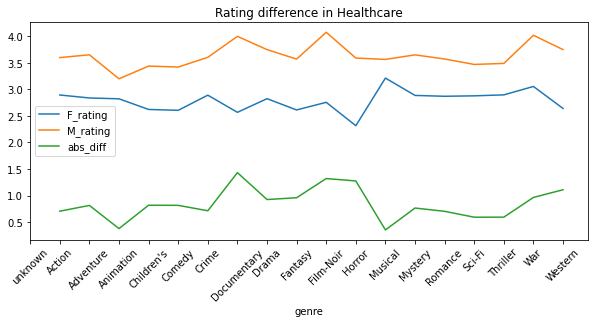

In [1096]:
hc_data = dataBase[dataBase.occupation == 'healthcare']
F = []
M = []
diff = []
for i in range(-19,0):
    rating = hc_data[hc_data.iloc[:,i]==1].groupby('gender').rating.mean()
    if rating.size == 0:
        F.append(0)
        M.append(0)
        diff.append(0)
    else:
        F.append(hc_data[hc_data.iloc[:,i]==1].groupby('gender').rating.mean()[0])
        M.append(hc_data[hc_data.iloc[:,i]==1].groupby('gender').rating.mean()[1])
        diff.append(abs(F[-1]-M[-1]))
        
hc_genre_rating = pd.DataFrame({'genre': genre.genre, 'F_rating': F, 'M_rating': M, 'abs_diff': diff})
hc_genre_rating.plot(x='genre',y=['F_rating','M_rating','abs_diff'],figsize = (10,4),rot=45,
               xticks= np.arange(19))
plt.title('Rating difference in Healthcare')

In [1103]:
hc_genre_rating.sort_values('abs_diff')

,genre,F_rating,M_rating,abs_diff
12,Musical,3.213592,3.565217,0.351625
3,Animation,2.822785,3.200000,0.377215
15,Sci-Fi,2.878788,3.470588,0.591800
16,Thriller,2.897129,3.489655,0.592526
14,Romance,2.870732,3.573034,0.702302
1,Action,2.894855,3.600000,0.705145
6,Crime,2.891720,3.604651,0.712931
13,Mystery,2.886598,3.651163,0.764565
2,Adventure,2.838583,3.652174,0.813591
5,Comedy,2.606061,3.421053,0.814992


In [1099]:
corr = hc_rating.corr()
corr

,F_rating,M_rating,abs_diff
F_rating,1.000000,0.018691,-0.666593
M_rating,0.018691,1.000000,0.732833
abs_diff,-0.666593,0.732833,1.000000


The above plots, statistics and the correlation matrix shows in healthcare population ratings
1). Male ratings are above female ratings for all genres.
2). Female ratings has little correlation with Male's, which imply a huge **gender difference** on rating different genres. Wihin this gender difference, femal and male agree most on the Musical and Animation movies and least on Documentary and Film-Noir movies.
**hypothesis 1: There is no significant gender rating difference for Musical and Animation movies within healthcare occupations. 
**hypothesis 2: In contrast, there is significan gender rating difference for Documentary and Film-Noir moviews within healthcare occupations. 

Text(0.5, 1.0, 'Rating across Ages and Occupation')

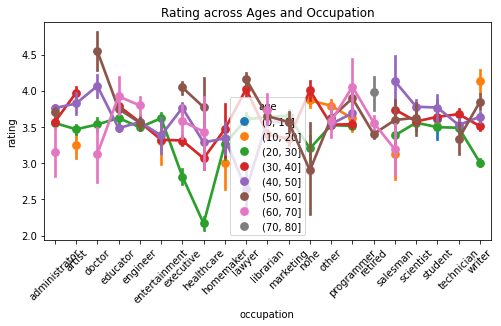

In [1251]:
interval = pd.Interval(30, 40, closed = 'right')
fig, ax = plt.subplots(figsize=(8,4))
sns.pointplot(data=dataBase, x = 'occupation', y = 'rating', hue = "age")

plt.xticks(rotation = 45)
plt.title("Rating across Ages and Occupation")

In [1249]:
hc_data.groupby('age').rating.describe().T

age,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
count,0.0,0.0,958.000000,164.000000,1637.000000,22.000000,23.000000,0.0
mean,NaN,NaN,2.168058,3.067073,3.285889,3.772727,3.434783,NaN
std,NaN,NaN,1.419355,0.979114,0.990235,0.922307,1.308229,NaN
min,NaN,NaN,1.000000,1.000000,1.000000,3.000000,1.000000,NaN
25%,NaN,NaN,1.000000,2.000000,3.000000,3.000000,3.000000,NaN
50%,NaN,NaN,1.000000,3.000000,3.000000,3.000000,4.000000,NaN
75%,NaN,NaN,3.000000,4.000000,4.000000,5.000000,4.000000,NaN
max,NaN,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


The plot shows a huge low rating in (20, 30) age group with the occupaiton of healthcare. However, the relatively small sample size and a big std may result in a bias from outlier sample data. In order to further investigate 
**A hypothesis could be drawn upon that within healthcare population age group between 20 and 30 has a lower ratings than the other age groups.**

**Potential Ethical Issues**

The dataset if are used for recommendation syste, it may deepen the division of the people by posting everyone the specific type of movies they like. There's also an observed gender difference in movie genres, Male prefer Film-Noir and Femal prefers Musical, e.g.. if recommendation is highly differented by gender then it may reinforce a social construction of gendering.

## Hypothesis – Classification

Hypothesis 1: Among all the occupations healthcare people make the lowest ratings;
Dependent variable: occupation
Independent variable: average rating

Control conditions: Sample from the entire population and group by occupation. A proper sample size needs to be Controlled across all groups. The sample age and gender distribution should resemble a normal distribution for all Groups. The sample genres should comprise a large variety with a similar distribution across each group.

Prediction: the group making the lowest average rating is the healthcare group.
Test statistic: mean of sample mean, in this case the mean of the correct rate.
Evaluation: experiment setup is the same with the controlled condition. Perform a Two Smaple t-Test for hypothesis testing.

Hypothesis 2: Healthcare people within the age group (20, 30) make the lowest rating than the other age groups.
Dependent variable: age group
Independent variable: average rating

Control condition: Sample from the healthcare population and group by age group (interval data). A proper sample size needs to be controlled across all groups. The sample gender distribution should resemble a normal Distribution for all groups. The sample genres should comprise a large variety with a similar distribution across each group.

Prediction: the group making the lowest average rating is the (20, 30) age group.
Test statistic: mean of sample mean, in this case the mean of the correct rate.
Evaluation: experiment setup is the same with the controlled condition. Perform a Two Smaple t-Test for hypothesis testing.

## Hypothesis – Regression

Hypothesis: Adult female overall rating is largely varied with ages
Dependent variable: Female average rating
Independent variable: Female ages 

Control conditions: Group female samples by age groups (interval data). Assign the samples to each group with a similar distribution of the kinds of genres being rated. The occupation, a confounding variable, needs to be controlled across age groups. Compute average rating for each group.

Prediction Model: Linear Regression
Performance Indicator: MSE
Evaluation: Random sample each age group to get a similar attributes representation (age, genres) for all age groups. While the distribution of controlled variables(occupation, genres) may not be the same as used in training set, the overall trend should resemble. Rather than compute MSE as the evaluation metric using correlation would describe the overall trend of ratings across age groups.

## Data Aqcuisition 

Hypothesis: People who rated above average on musical movies engage in music activities more often than the people who rated below the average. 
Data Aquisition: Providing an interval or ordinal scale survey people who rated musical movies on the frequency and time of participating in music activities.
Possible problems: Self report is subject to individual wich may not reflect the reality and may not be consistent for the same condition. It could happen that people who are actually equally active with music may report with a very different measurement. 
I don't think it will cause any ethical issues.